In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [83]:
# create a num ranked column
df = pd.read_csv('data/clean2.csv')
df.head()


,Timestamp,id,major_status,taken_courses,grad_semester,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,...,212-2,219-1,302-1,214-1,315-1,212-1,428-1,310-1,496-2,496-1
0,10/29/2023 18:04:33,0,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 211...",Spring 2025,"303-1, DATABASE SYSTEMS","428-1, GENERATIVE DATA MODELING","315-1, COMPUTER NETWORKS","214-1, WEB TECH","310-1, ROBOTICS",...,0,0,0,1,1,0,1,1,0,0
1,10/30/2023 14:54:36,1,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 205...",Spring 2025,"304-1, ALGORITHMS","302-1, OBJECT-ORIENTED SOFTWARE DESIGN","315-1, COMPUTER NETWORKS","214-1, WEB TECH","496-1, RESEARCH SEMINAR",...,0,1,1,1,1,0,0,0,1,1
2,10/31/2023 13:53:58,2,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 212...",Spring 2025,"313-1, ALGORITHMIC GAME THEORY","302-1, OBJECT-ORIENTED SOFTWARE DESIGN","214-1, WEB TECH","303-1, DATABASE SYSTEMS","315-1, COMPUTER NETWORKS",...,0,0,1,1,1,0,1,0,0,0
3,11/1/2023 12:36:27,3,intended CS major,COM 110 CC:INTRO COMP SCI & PROB SOLV,Spring 2027,"212-2, DATA STRUCTURES","212-1, DATA STRUCTURES",NaN,NaN,NaN,...,1,0,0,0,0,1,0,0,0,0
4,10/23/2023 14:02:40,4,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 212...",Spring 2025,"219-1, COMPUTER ORGANIZATION","304-1, ALGORITHMS","302-1, OBJECT-ORIENTED SOFTWARE DESIGN","303-1, DATABASE SYSTEMS","310-1, ROBOTICS",...,0,1,1,1,1,0,1,1,1,1


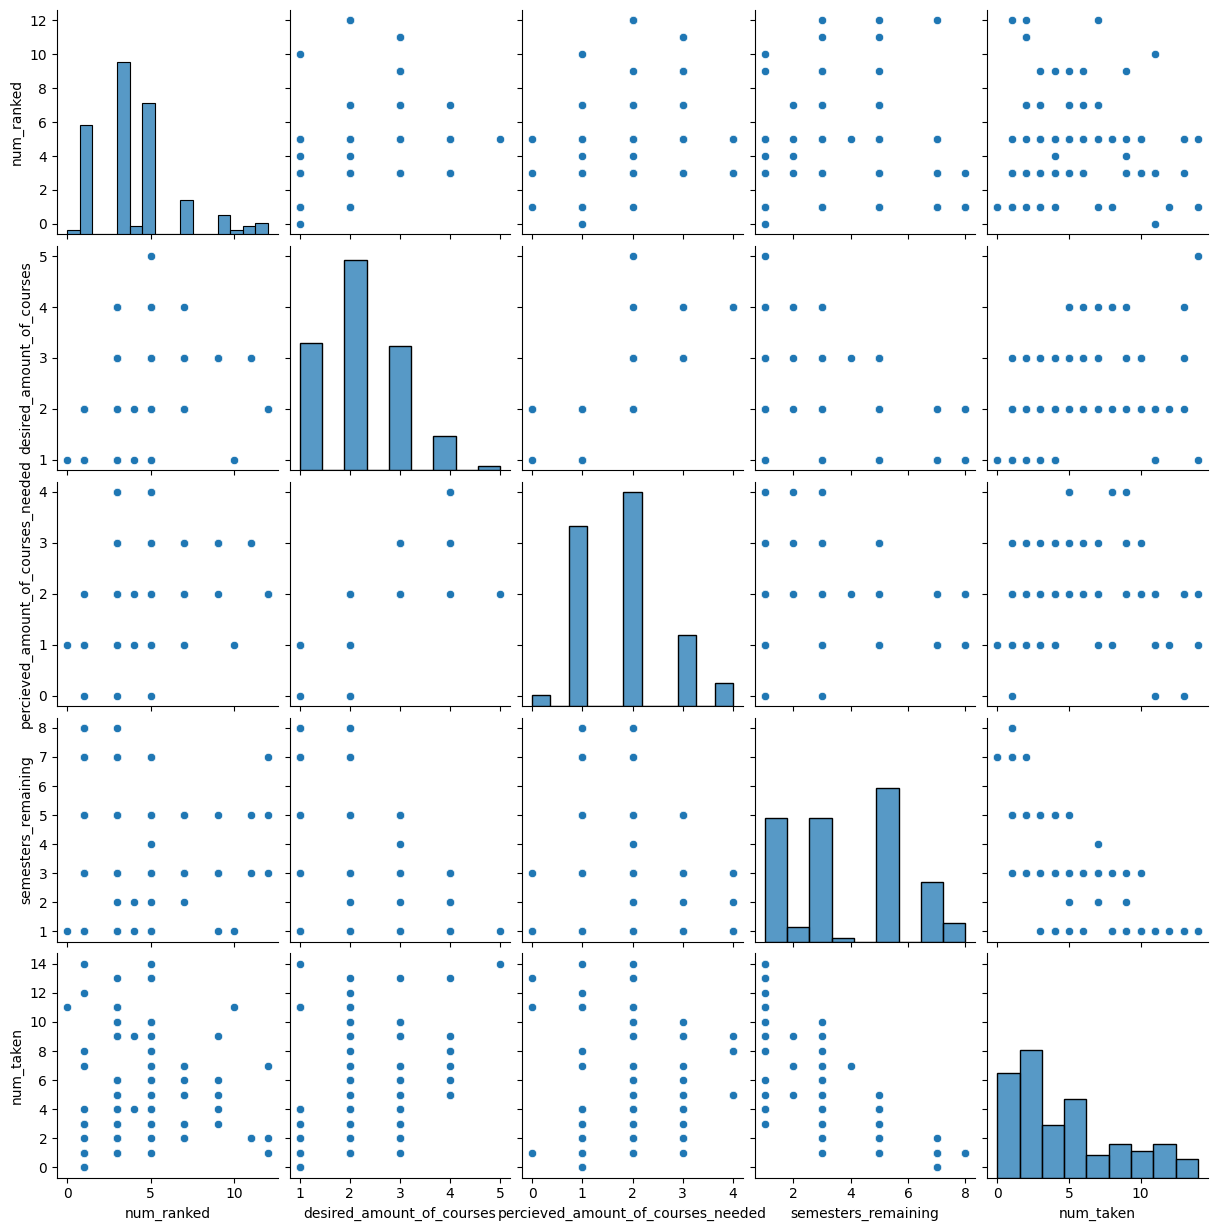

In [84]:
# pair wise plots for all numeric columns
sns.pairplot(
    df, 
    vars=[
        'num_ranked', 
        'desired_amount_of_courses',
        'percieved_amount_of_courses_needed',
        'semesters_remaining',
        'num_taken'
        ], 
    )
plt.show()

These scatterplots show the relationship between each numeric variable in the data set. Most of these do not provide any insight, but it does seem like desired_amount_of_courses and percieved_need may have some correlation. It also looks like num_taken and semesters_remaining have a negative correlation, which would intuitively make sense. Further analysis is needed to draw any conclusions. 

In [85]:
# Pearson correlations between all numeric columns
pearson = df[[
    "desired_amount_of_courses",
    "percieved_amount_of_courses_needed",
    "num_ranked",
    "semesters_remaining",
    "num_taken"
    ]].corr(method='pearson')
pearson

,desired_amount_of_courses,percieved_amount_of_courses_needed,num_ranked,semesters_remaining,num_taken
desired_amount_of_courses,1.000000,0.803352,0.404302,-0.383343,0.393603
percieved_amount_of_courses_needed,0.803352,1.000000,0.414263,-0.263219,0.194408
num_ranked,0.404302,0.414263,1.000000,-0.150625,0.119330
semesters_remaining,-0.383343,-0.263219,-0.150625,1.000000,-0.819939
num_taken,0.393603,0.194408,0.119330,-0.819939,1.000000


In [86]:
# Spearman correlation between all numeric columns
spearman = df[[
    "desired_amount_of_courses",
    "percieved_amount_of_courses_needed",
    "num_ranked",
    "semesters_remaining",
    "num_taken"
    ]].corr(method='spearman')
spearman

,desired_amount_of_courses,percieved_amount_of_courses_needed,num_ranked,semesters_remaining,num_taken
desired_amount_of_courses,1.000000,0.825877,0.522786,-0.351382,0.479559
percieved_amount_of_courses_needed,0.825877,1.000000,0.523905,-0.256983,0.346687
num_ranked,0.522786,0.523905,1.000000,-0.187784,0.303511
semesters_remaining,-0.351382,-0.256983,-0.187784,1.000000,-0.864438
num_taken,0.479559,0.346687,0.303511,-0.864438,1.000000


From the Pearson and Spearman correlations we can conclude that percieved_amount_of_courses_needed and desired_amount_of_courses are highly correlated. Both the Spearman and Pearson values between the variables is over 0.8. There is also a moderate positive correlation (>0.5) between num_ranked and desired_amount_of_courses in the Spearman correlation and num_ranked and percieved_amount_of_courses_needed. These correlations are weak in the Pearson correlation. Both the Pearson and Spearman correlations confirm a strong negative correlation between num_taken and semesters_remaining.

In [87]:
# ranking_1 and major status crosstab
cross = pd.crosstab(df['ranking_1'], df['major_status'])
cross

major_status,CS minor,declared CS major,intended CS major,none of the above
ranking_1,,,,
"212-1, DATA STRUCTURES",6,0,12,1
"212-2, DATA STRUCTURES",1,1,3,0
"214-1, WEB TECH",0,3,0,0
"219-1, COMPUTER ORGANIZATION",0,7,13,0
"302-1, OBJECT-ORIENTED SOFTWARE DESIGN",1,10,1,0
"303-1, DATABASE SYSTEMS",3,5,0,0
"304-1, ALGORITHMS",0,20,2,0
"310-1, ROBOTICS",1,6,2,0
"313-1, ALGORITHMIC GAME THEORY",1,2,1,0


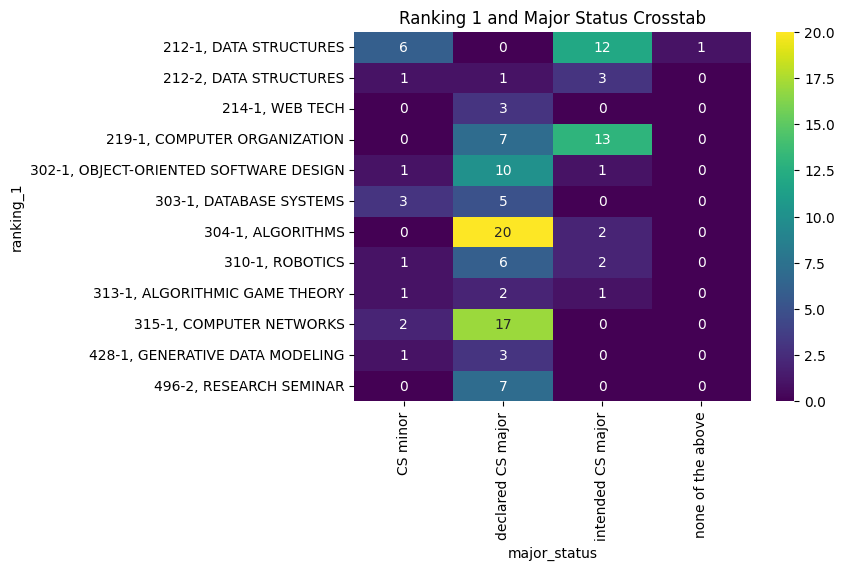

In [88]:
sns.heatmap(cross, annot=True, fmt="g", cmap='viridis')
plt.title('Ranking 1 and Major Status Crosstab')
plt.show()

In [89]:
# ranking_2 and major status crosstab
cross = pd.crosstab(df['ranking_2'], df['major_status'])
cross

major_status,CS minor,declared CS major,intended CS major,none of the above
ranking_2,,,,
"212-1, DATA STRUCTURES",1,0,3,0
"212-2, DATA STRUCTURES",5,0,12,1
"214-1, WEB TECH",2,4,2,0
"219-1, COMPUTER ORGANIZATION",0,6,1,0
"302-1, OBJECT-ORIENTED SOFTWARE DESIGN",1,11,1,0
"303-1, DATABASE SYSTEMS",3,8,4,0
"304-1, ALGORITHMS",0,2,3,0
"310-1, ROBOTICS",0,3,0,0
"313-1, ALGORITHMIC GAME THEORY",1,7,5,0


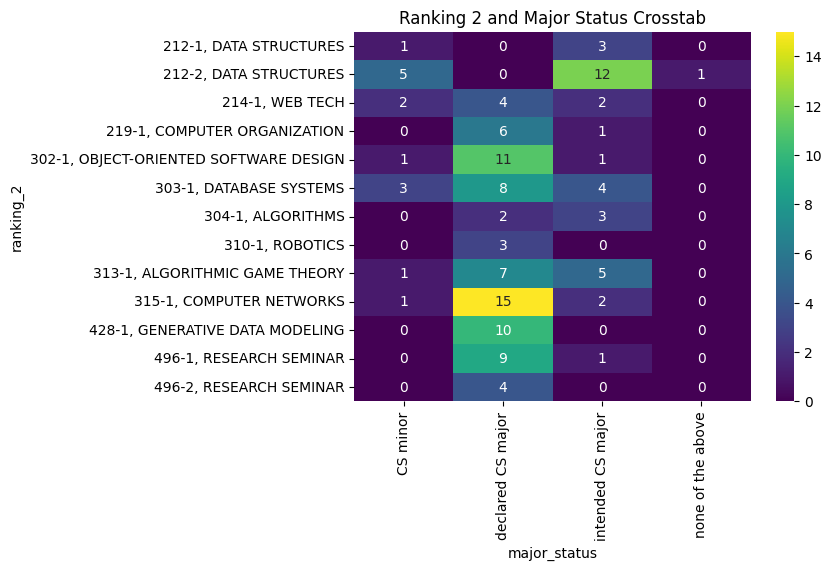

In [90]:
sns.heatmap(cross, annot=True, fmt="g", cmap='viridis')
plt.title('Ranking 2 and Major Status Crosstab')
plt.show()

From these crosstabs we can conclude a few things about students grouped by major status. 

Algorithms was the most popular first choice amongst CS majors, however it was one of the least popular second choices. This seems to indicate that students who desired to take algorithms tended to rank it above all other courses. Computer 
networks was the second most popular first choice, and the most popular second choice amongst CS majors.

Intended CS majors seemed to rank data structures and computer organization highly, which makes sense considering that they are some of the early major requirements. CS minors also ranked data structures highly, and interestingly seemed to also rank database systems highly more than other courses.

In [91]:
# ranking_1 and num_ranked pivot table
pivot = pd.pivot_table(
    df, 
    index='ranking_1', 
    values=['num_ranked', 'num_taken', 'desired_amount_of_courses', 'semesters_remaining'],
    aggfunc=['mean', 'median', 'std'])
pivot

mean             \
                                       desired_amount_of_courses num_ranked   
ranking_1                                                                     
212-1, DATA STRUCTURES                                  1.210526   1.315789   
212-2, DATA STRUCTURES                                  1.400000   1.800000   
214-1, WEB TECH                                         2.000000   7.333333   
219-1, COMPUTER ORGANIZATION                            2.000000   4.200000   
302-1, OBJECT-ORIENTED SOFTWARE DESIGN                  2.250000   4.333333   
303-1, DATABASE SYSTEMS                                 1.750000   2.750000   
304-1, ALGORITHMS                                       2.818182   5.727273   
310-1, ROBOTICS                                         2.333333   5.333333   
313-1, ALGORITHMIC GAME THEORY                          2.000000   3.000000   
315-1, COMPUTER NETWORKS                                2.684211   4.368421   
428-1, GENERATIVE DATA MODELING                         2.000000   4.000000   
496-2, RESEARCH SEMINAR                                 2.571429   3.857143   

                                                                       \
                                        num_taken semesters_remaining   
ranking_1                                                               
212-1, DATA STRUCTURES                   0.894737            6.157895   
212-2, DATA STRUCTURES                   1.200000            7.200000   
214-1, WEB TECH                          8.000000            2.333333   
219-1, COMPUTER ORGANIZATION             2.300000            5.300000   
302-1, OBJECT-ORIENTED SOFTWARE DESIGN   6.166667            3.000000   
303-1, DATABASE SYSTEMS                  6.250000            2.000000   
304-1, ALGORITHMS                        4.954545            3.727273   
310-1, ROBOTICS                          6.222222            3.222222   
313-1, ALGORITHMIC GAME THEORY           3.750000            4.000000   
315-1, COMPUTER NETWORKS                 6.842105            2.052632   
428-1, GENERATIVE DATA MODELING          7.500000            2.000000   
496-2, RESEARCH SEMINAR                 10.428571            1.142857   

                                                          median             \
                                       desired_amount_of_courses num_ranked   
ranking_1                                                                     
212-1, DATA STRUCTURES                                         1          1   
212-2, DATA STRUCTURES                                         1          1   
214-1, WEB TECH                                                2          7   
219-1, COMPUTER ORGANIZATION                                   2          3   
302-1, OBJECT-ORIENTED SOFTWARE DESIGN                         2          3   
303-1, DATABASE SYSTEMS                                        2          3   
304-1, ALGORITHMS                                              3          5   
310-1, ROBOTICS                                                2          5   
313-1, ALGORITHMIC GAME THEORY                                 2          3   
315-1, COMPUTER NETWORKS                                       3          5   
428-1, GENERATIVE DATA MODELING                                2          3   
496-2, RESEARCH SEMINAR                                        3          3   

                                                                      \
                                       num_taken semesters_remaining   
ranking_1                                                              
212-1, DATA STRUCTURES                       1.0                   7   
212-2, DATA STRUCTURES                       1.0                   8   
214-1, WEB TECH                             10.0                   1   
219-1, COMPUTER ORGANIZATION                 2.0                   5   
302-1, OBJECT-ORIENTED SOFTWARE DESIGN       5.5                   3   
303-1, DATABASE 

In [92]:
# create a pivot for course popularity (ranked anywhere) reletive to different major statuses
import re
pattern = "\d{3}-\d"
courses = []
for col in df.columns:
    if re.match(pattern, col):
        courses.append(col)
        
pivot = pd.pivot_table(
    df, 
    index='major_status', 
    values=courses,
    aggfunc=['sum'])
pivot

sum                                                        \
                  212-1 212-2 214-1 219-1 302-1 303-1 304-1 310-1 313-1 315-1   
major_status                                                                    
CS minor              7     7     2     3     2     7     1     2     4     5   
declared CS major     3     4    38    17    51    52    31    41    36    56   
intended CS major    15    16     8    17    14    13     9     9     9     6   
none of the above     1     1     0     0     0     0     0     0     0     0   

                                     
                  428-1 496-1 496-2  
major_status                         
CS minor              1     0     0  
declared CS major    39    30    33  
intended CS major     4     3     1  
none of the above     0     0     0

This pivot table shows the number of 